In [1]:
import matplotlib.pyplot as plt
import torch
from mypackage.training.models.task import SimpleMLPTask
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
ckpt_path = "../lightning_logs/version_0/checkpoints/best_model.ckpt"
model = SimpleMLPTask.load_from_checkpoint(ckpt_path).cpu()

users_emb = model.net.embed_user.weight.data.numpy()
items_emb = model.net.embed_item.weight.data.numpy()

users_emb.shape, items_emb.shape

((2607, 24), (450, 24))

# TSNE

In [3]:
users_emb_tsne = TSNE(2).fit_transform(users_emb)
items_emb_tsne = TSNE(2).fit_transform(items_emb)

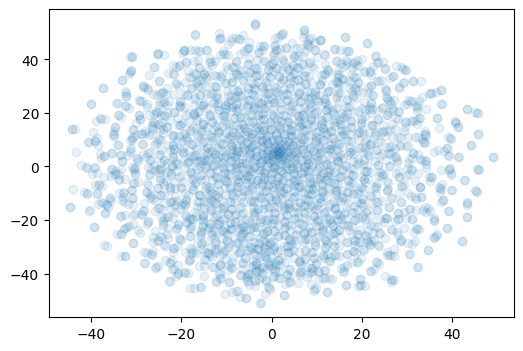

In [4]:
plt.figure(figsize=(6, 4))
plt.scatter(users_emb_tsne[:, 0], users_emb_tsne[:, 1], alpha=0.1)
plt.show()

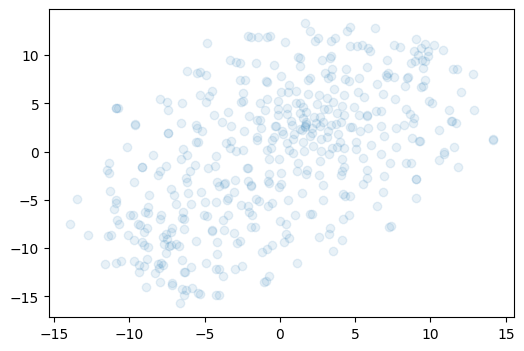

In [5]:
plt.figure(figsize=(6, 4))
plt.scatter(items_emb_tsne[:, 0], items_emb_tsne[:, 1], alpha=0.1)
plt.show()

# PCA

In [6]:
pca = PCA(n_components=2)
pca.fit(users_emb)
users_emb_pca = pca.transform(users_emb)

pca.explained_variance_ratio_

array([0.09563466, 0.06330395], dtype=float32)

In [7]:
pca = PCA(n_components=2)
pca.fit(items_emb)
items_emb_pca = pca.transform(items_emb)

pca.explained_variance_ratio_

array([0.19650126, 0.07504608], dtype=float32)

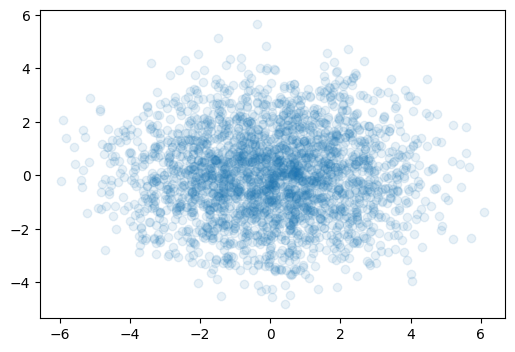

In [8]:
plt.figure(figsize=(6, 4))
plt.scatter(users_emb_pca[:, 0], users_emb_pca[:, 1], alpha=0.1)
plt.show()

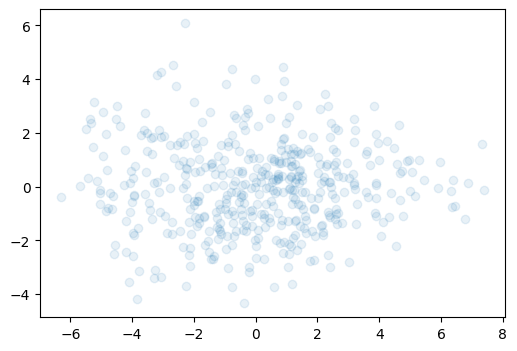

In [9]:
plt.figure(figsize=(6, 4))
plt.scatter(items_emb_pca[:, 0], items_emb_pca[:, 1], alpha=0.1)
plt.show()